# Data Analysis 



## 1. Correlation Heatmap

Creating a heat map that visualizes the correlations between stocks and indices 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing

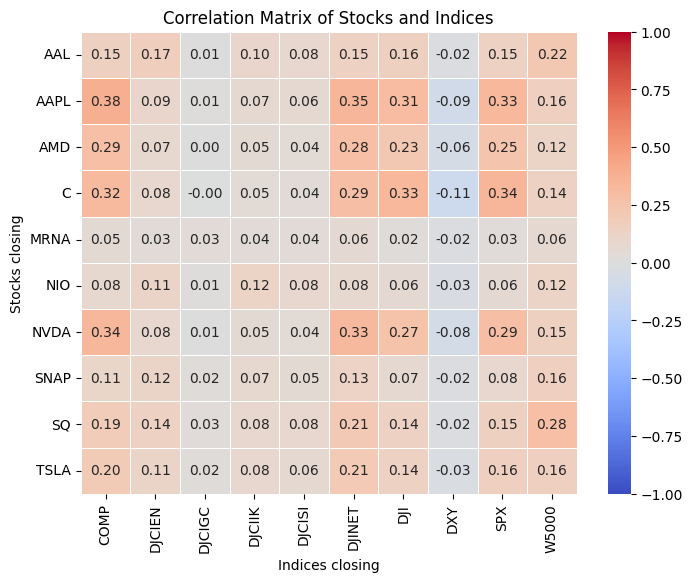

In [63]:
csv_pfad = '../../differenced.csv'

df = pd.read_csv(csv_pfad, index_col=1, parse_dates=True)

df.columns = [col.replace("close ", "") for col in df.columns]

stocks = df.iloc[:, 1:11]  
indices = df.iloc[:, 11:21]  


# Konvertierung der Ergebnisse in einen DataFrame für die Heatmap
korrelationen = pd.DataFrame(index=stocks.columns, columns=indices.columns)
for col1 in stocks.columns:
    for col2 in indices.columns:
        korrelationen.at[col1, col2] = stocks[col1].corr(indices[col2])

plt.figure(figsize=(8, 6)) 
sns.heatmap(korrelationen.astype(float), annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, cbar=True, vmin=-1, vmax=1)

plt.title('Correlation Matrix of Stocks and Indices')
plt.xlabel('Indices closing')
plt.ylabel('Stocks closing')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Splitted heatmaps: Indices only and stocks only

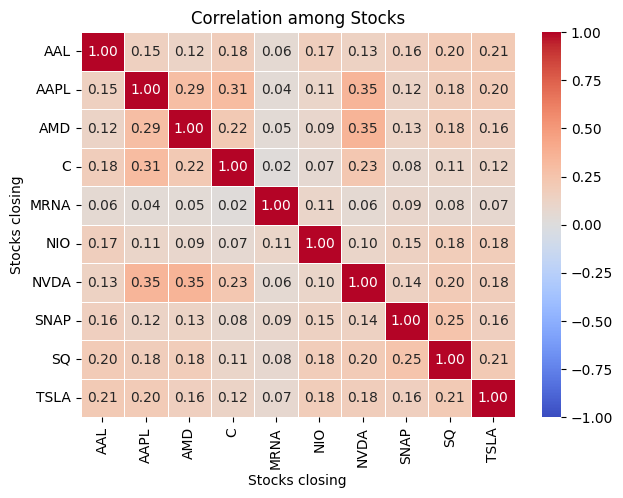

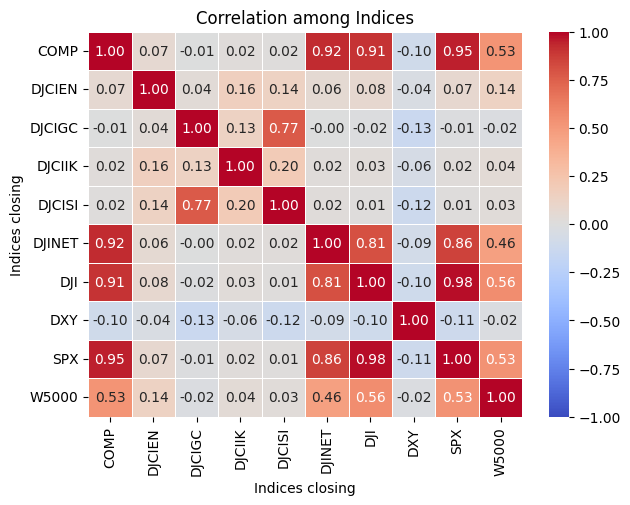

In [70]:


# Heatmap jeweils für Indices und Aktien getrennt
kurs_spalten_stocks = df.iloc[:, 1:11]
kurs_spalten_indices = df.iloc[:, 11:21]

korrelationsmatrix_stocks = kurs_spalten_stocks.corr()
korrelationsmatrix_indices = kurs_spalten_indices.corr()

plt.figure(figsize=(7, 5))  # Größe des Plots anpassen
sns.heatmap(korrelationsmatrix_stocks, annot=True, cmap='coolwarm', fmt=".2f", 
        linewidths=.5, cbar=True, vmin=-1, vmax=1)

plt.title('Correlation among Stocks')
plt.xlabel('Stocks closing')
plt.ylabel('Stocks closing')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

plt.figure(figsize=(7, 5))  # Größe des Plots anpassen
sns.heatmap(korrelationsmatrix_indices, annot=True, cmap='coolwarm', fmt=".2f", 
        linewidths=.5, cbar=True, vmin=-1, vmax=1)

plt.title('Correlation among Indices')
plt.xlabel('Indices closing')
plt.ylabel('Indices closing')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Correlations between indices and stocks as well as correlations among stocks themselves are desirable for our model in order to improve the prediction quality. However, we would like to avoid correlations within the indices (independent variables) in order to avoid multicollinearity in our model.    
In terms of stocks, Nvidia is correlated with Apple and Advanced Micro Devices. This is in line with our expectations, as Nvidia and AMD operate in very related fields and Apple also operates in a very similar business field in the computer industry.
Unfortunately, the indices correlate strongly with each other. COMP, DJINET, DJI and SPX in particular show a strong correlation. In addition, the overall heatmap above shows that these indices correlate with the same stocks.   
In order to avoid multicollinearity DJINET, DJI and SPX are excluded from the data and only COMP is kept, as COMP correlates strongly with all three indices and also has the strongest influence on the stocks.
The correlation analysis can also be used to better diversify stock investments. However, this was not pursued further in our project due to time constraints.


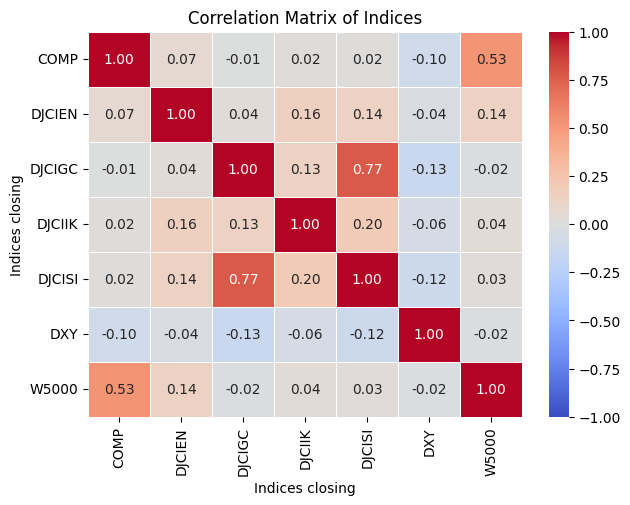

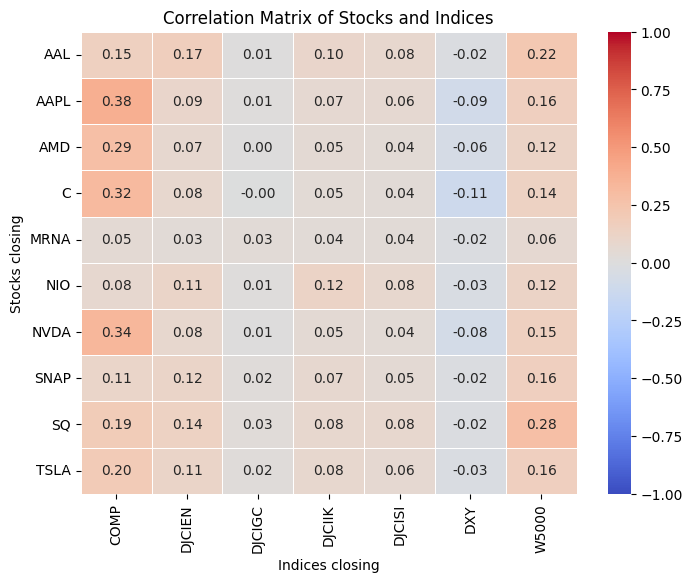

In [65]:

df_cleaned = df.drop(columns=['DJINET', 'DJI', 'SPX'])  
    # Heatmap jeweils für Indices und Aktien getrennt

kurs_indices_clean = df_cleaned.iloc[:, 11:18]

korrelationsmatrix_indices_clean = kurs_indices_clean.corr()

plt.figure(figsize=(7, 5))  # Größe des Plots anpassen
sns.heatmap(korrelationsmatrix_indices_clean, annot=True, cmap='coolwarm', fmt=".2f", 
        linewidths=.5, cbar=True, vmin=-1, vmax=1)

plt.title('Correlation Matrix of Indices')
plt.xlabel('Indices closing')
plt.ylabel('Indices closing')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


# ab hier gut

    

stocks = df_cleaned.iloc[:, 1:11]  
indices = df_cleaned.iloc[:, 11:18] 

korrelationen_clean = pd.DataFrame(index=stocks.columns, columns=indices.columns)
for col1 in stocks.columns:
    for col2 in indices.columns:
        korrelationen_clean.at[col1, col2] = stocks[col1].corr(indices[col2])

plt.figure(figsize=(8, 6)) 
sns.heatmap(korrelationen_clean.astype(float), annot=True, cmap='coolwarm', fmt=".2f",
        linewidths=.5, cbar=True, vmin=-1, vmax=1)

plt.title('Correlation Matrix of Stocks and Indices')
plt.xlabel('Indices closing')
plt.ylabel('Stocks closing')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## 2. Volatility

The volatility of a share is based on the changes in its price and provides an insight into the risk and stability of the share over time. These price changes reflect the short-term upward and downward movements of the share price and are a key indicator of market dynamics. In order to obtain a quantitative measure of the share's volatility, we calculate the standard deviation of the differentiated closing prices.

The standard deviation measures the dispersion or dispersion rate of the price changes from their mean value. A higher value of the standard deviation indicates higher volatility, which means that share prices fluctuate strongly over the period under consideration. In contrast, a lower standard deviation indicates a more stable share whose prices deviate less strongly from their mean value.

High volatile stocks are particularly attractive for day trading, where stocks are held and traded within short periods of time
The reason for this lies in their potential for significant profits, which can be realised through targeted speculation on short-term market movements. This strategy takes advantage of the sharp price fluctuations of volatile stocks to optimise buy and sell decisions within a trading day.

However, it is crucial to be aware of the increased risk associated with high volatility. The increased uncertainty and unpredictability of price movements can also lead to significant losses. Therefore, successful day trading requires not only a careful selection of volatile stocks, but also a sound risk management strategy e.g. setting stop-loss orders and diversifying the portfolio. For this reason, we have analysed the volatility of our stocks.

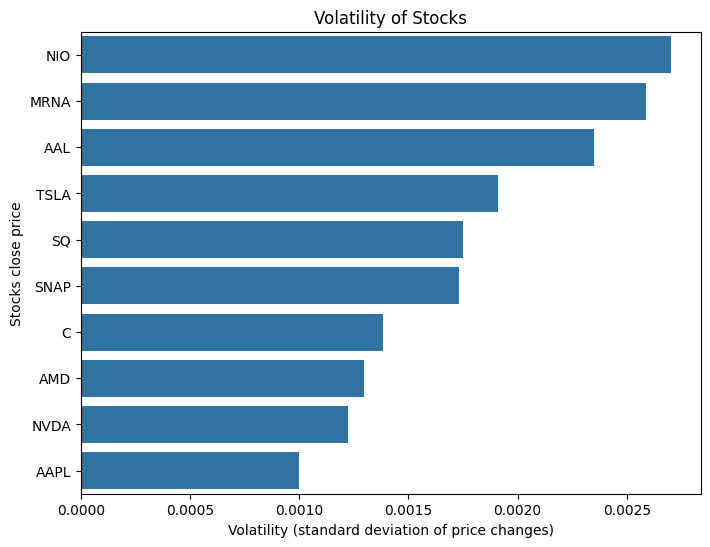

In [9]:
csv_pfad = '../../differenced_daily.csv'

df_vola = pd.read_csv(csv_pfad, index_col=1, parse_dates=True)

df_vola.columns = [col.replace("close ", "") for col in df_vola.columns]

df_modified = df_vola.iloc[:, 1:11]

volatilitaet = df_modified.std()

volatilitaet_sorted = volatilitaet.sort_values(ascending=False)


plt.figure(figsize=(8,6))
sns.barplot(x=volatilitaet_sorted.values, y=volatilitaet_sorted.index)
plt.xlabel('Volatility (standard deviation of price changes)')
plt.ylabel('Stocks close price')
plt.title('Volatility of Stocks')
plt.show()

## 3. Seasonality
differenced data, 1h aggregation
Comparison of Means: Hourly, Daily, Monthly 

An alternative to the complex ANOVA is the Kruskal-Wallis test, a non-parametric test that does not assume a normal distribution and can be used to check whether the median values of the closing prices differ significantly between different hours.

### 3.1. Seasonality by Hour

In [21]:
from scipy.stats import kruskal

csv_pfad = '../../differenced.csv'

df = pd.read_csv(csv_pfad, index_col=1, parse_dates=True)

df.columns = [col.replace("close ", "") for col in df.columns]

stocks = df.iloc[:, 1:11]  

stocks_sum = stocks.sum(axis=1)


grouped = stocks_sum.groupby(stocks_sum.index.hour)

print(grouped.mean())

# Data Preparation for Kruskal-Wallis-Test
data_for_test = [group.values for name, group in grouped]

stat, p = kruskal(*data_for_test)

print(f"Kruskal-Wallis-Test Statistik: {stat}, p-Wert: {p}")

# Evaluation if significance
if p < 0.001:
    print("Es gibt signifikante Unterschiede zwischen den stündlichen Mittelwerten.")
else:
    print("Es gibt keine signifikanten Unterschiede zwischen den stündlichen Mittelwerten.")

timestamp
4     0.004924
5     0.000568
6     0.000343
7     0.002467
8     0.002099
9    -0.002872
10   -0.000856
11    0.000918
12    0.000172
13   -0.001161
14   -0.000002
15   -0.000043
16    0.000646
17    0.000947
18    0.000606
19    0.001171
dtype: float64
Kruskal-Wallis-Test Statistik: 197.619216058845, p-Wert: 6.468786672117165e-34
Es gibt signifikante Unterschiede zwischen den stündlichen Mittelwerten.


### 3.2.  Seasonality by Weekday

In [26]:
grouped_by_weekday = stocks_sum.groupby(stocks_sum.index.weekday)
print(grouped_by_weekday.mean())

data_for_weekday_test = [group.values for name, group in grouped_by_weekday]
stat_weekday, p_weekday = kruskal(*data_for_weekday_test)

print(f"Kruskal-Wallis-Test Statistik für Wochentage: {stat_weekday}, p-Wert: {p_weekday}")

if p_weekday < 0.001:
    print("Es gibt signifikante Unterschiede zwischen den mittleren Schlusskursen der Wochentage.")
else:
    print("Es gibt keine signifikanten Unterschiede zwischen den mittleren Schlusskursen der Wochentage.")

timestamp
0    0.000870
1    0.000926
2    0.000959
3    0.000305
4   -0.000195
5    0.000000
6    0.000023
dtype: float64
Kruskal-Wallis-Test Statistik für Wochentage: 50.12044751442599, p-Wert: 4.446808254589569e-09
Es gibt signifikante Unterschiede zwischen den mittleren Schlusskursen der Wochentage.


### 3.3.  Seasonality by Month

In [27]:
grouped_by_month = stocks_sum.groupby(stocks_sum.index.month)
print(grouped_by_month.mean())

data_for_month_test = [group.values for name, group in grouped_by_month]
stat_month, p_month = kruskal(*data_for_month_test)

print(f"Kruskal-Wallis-Test Statistik für Monate: {stat_month}, p-Wert: {p_month}")

if p_month < 0.05:
    print("Es gibt signifikante Unterschiede zwischen den mittleren Schlusskursen der Monate.")
else:
    print("Es gibt keine signifikanten Unterschiede zwischen den mittleren Schlusskursen der Monate.")

timestamp
1     0.000353
2     0.000793
3     0.000162
4     0.000881
5     0.000519
6     0.000314
7     0.000531
8     0.000919
9     0.000269
10    0.000220
11    0.001418
12    0.000255
dtype: float64
Kruskal-Wallis-Test Statistik für Monate: 7.732889127844894, p-Wert: 0.7370126036688599
Es gibt keine signifikanten Unterschiede zwischen den mittleren Schlusskursen der Monate.


## 4. Missing Values

The trading times of the stocks and indices have an influence on which times we include in our training. We have therefore looked at the times at which we have non-zero data. As with the correlation analysis, we also take the closing price as the basis here. 

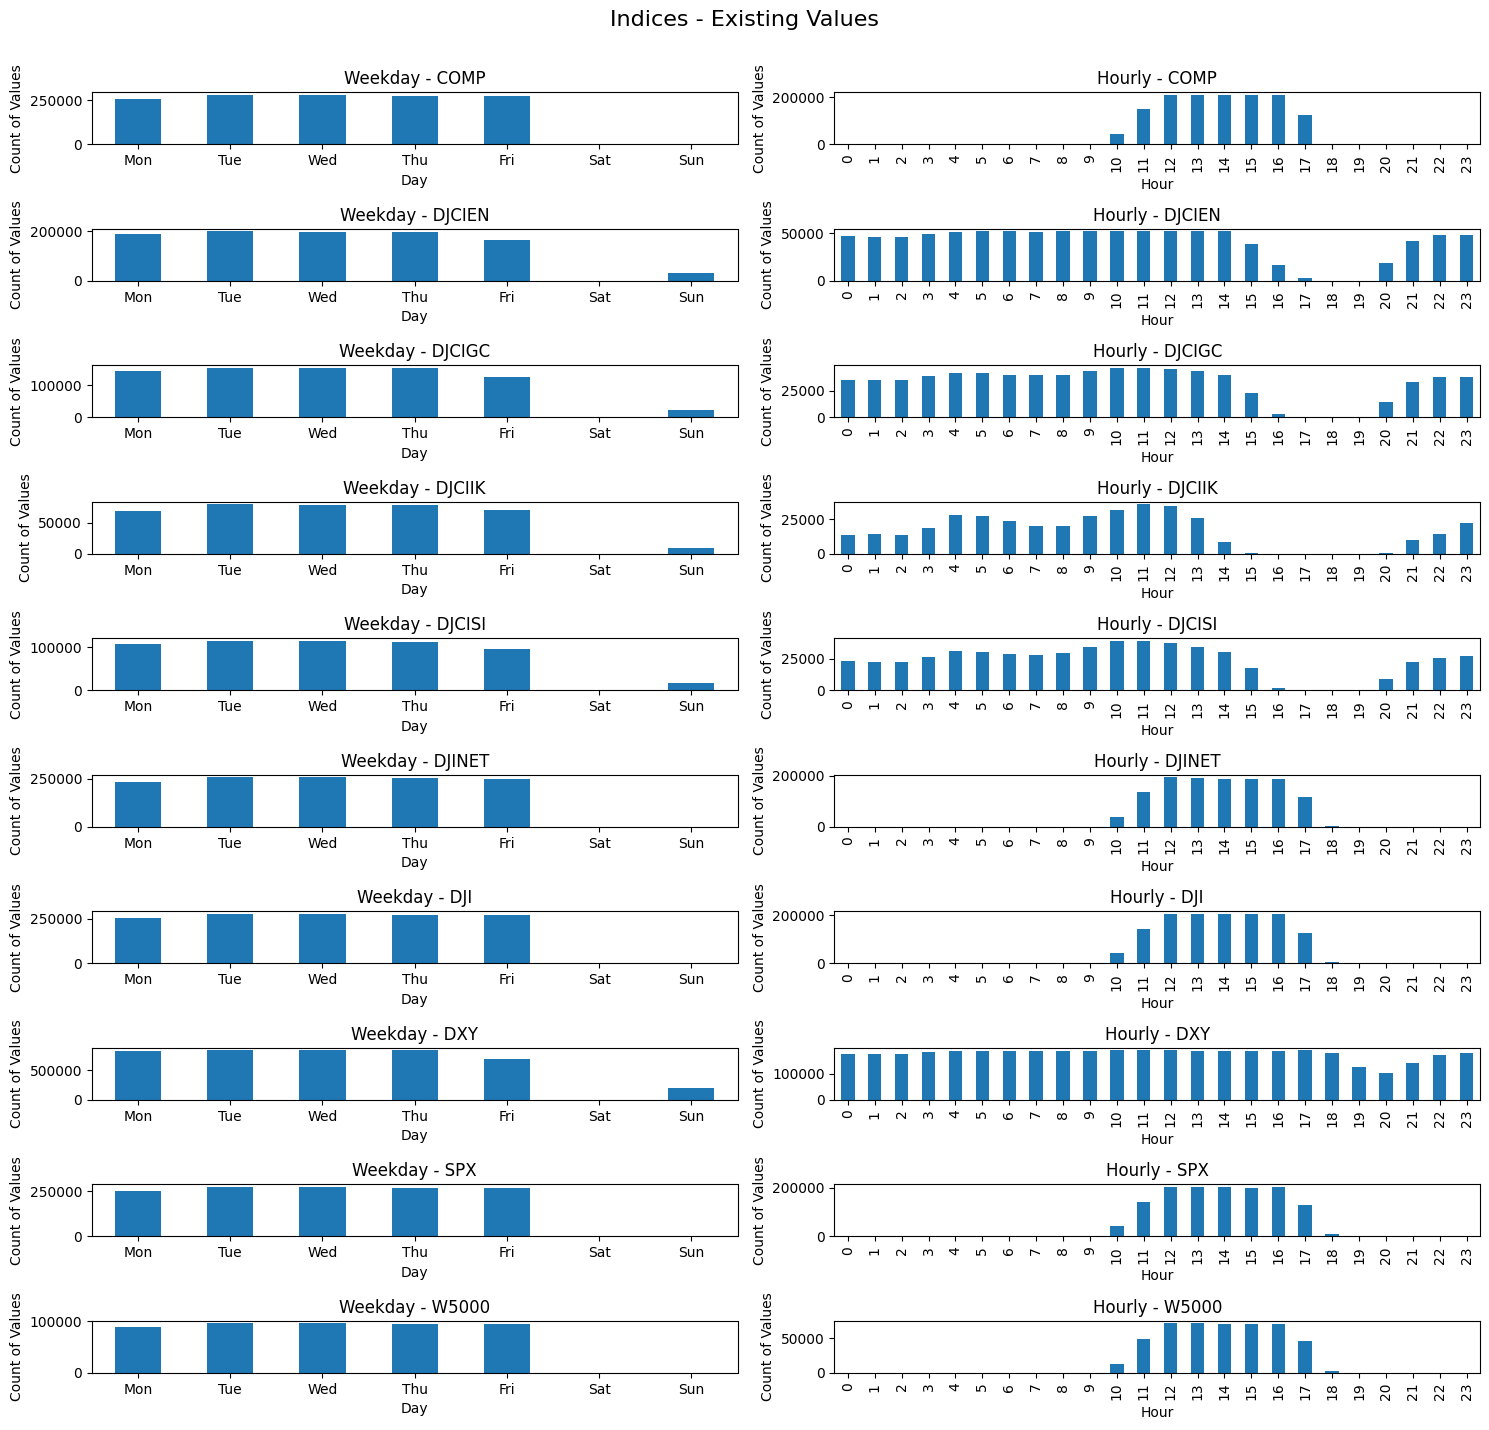

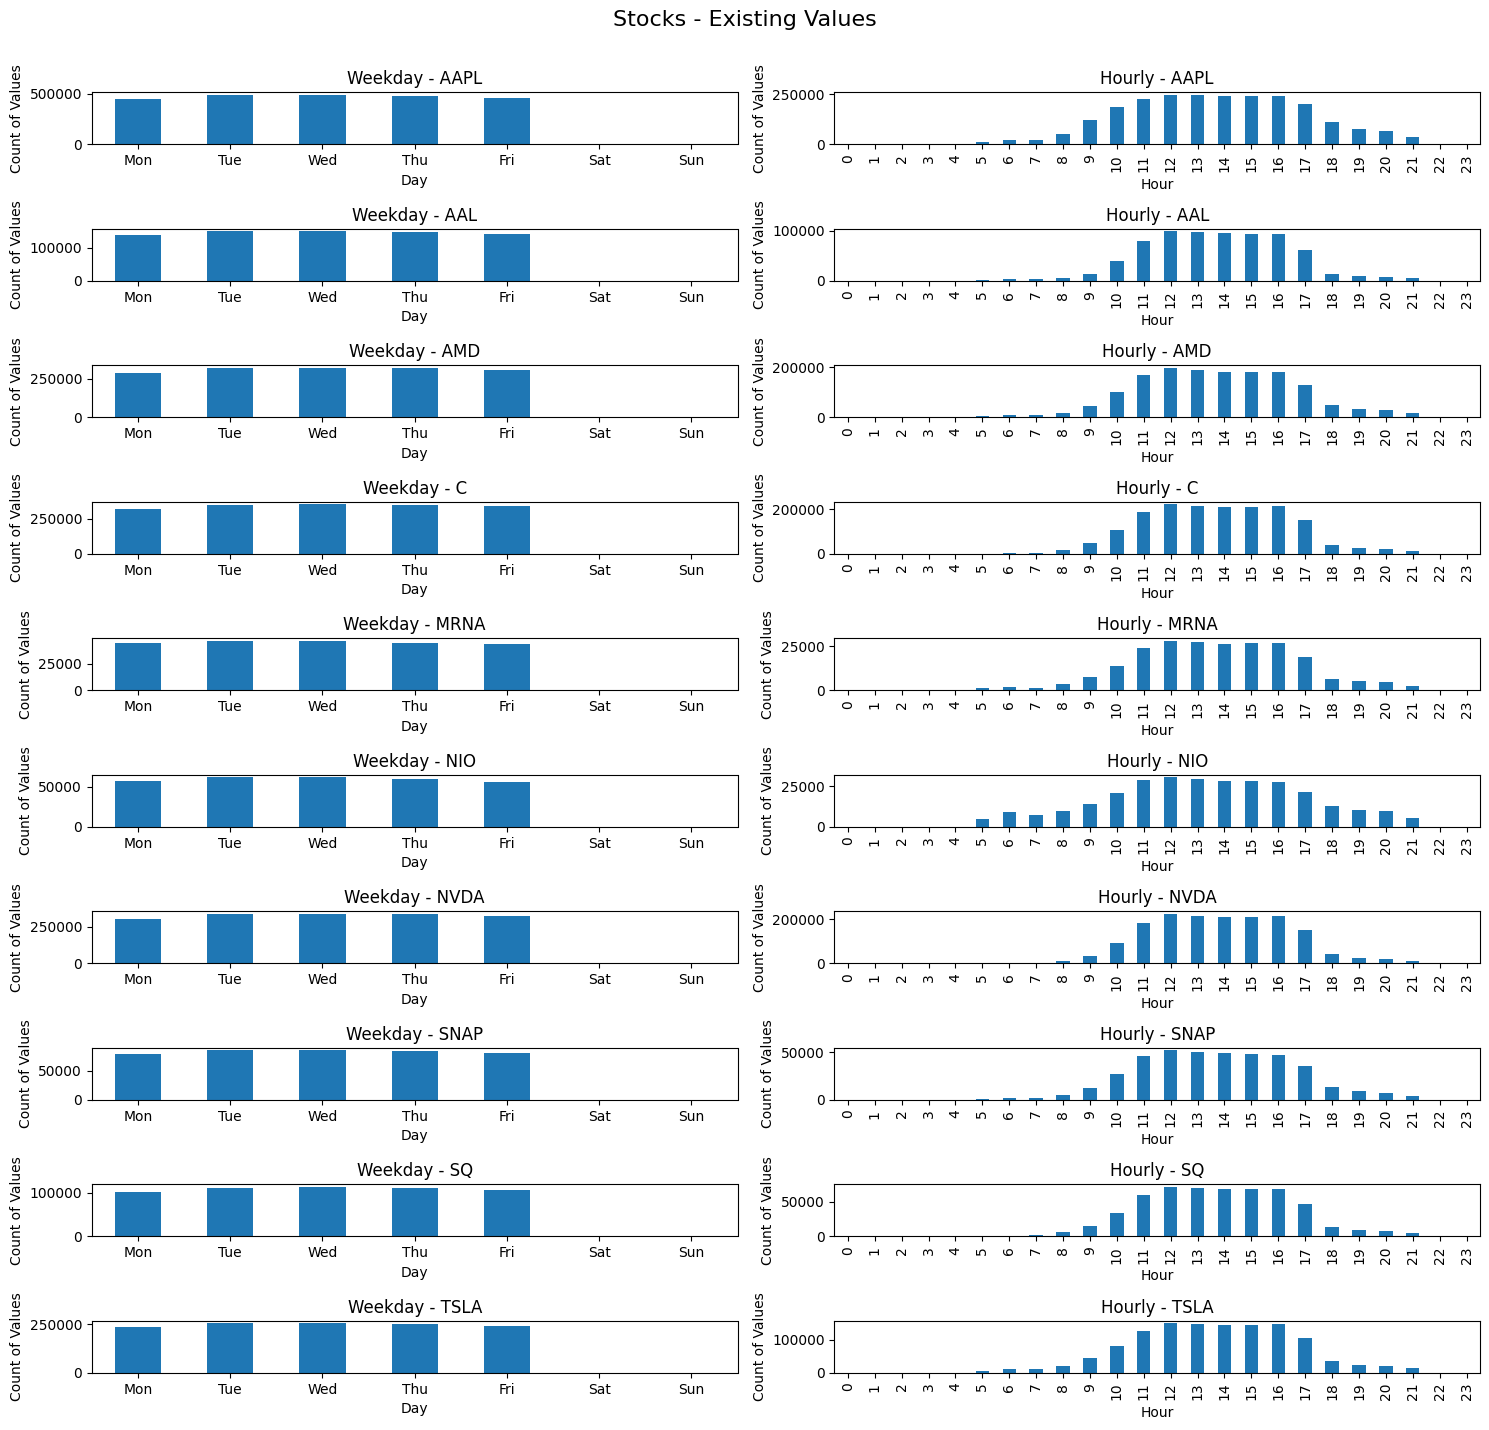

In [7]:
df_mv = pd.read_csv('../../data/output/Multi_Symbol_full_dataset.csv')
df_mv['timestamp'] = df_mv['posix_time'].apply(lambda p : datetime.fromtimestamp(p))


# Assuming the relevant columns are from the second column to "close TSLA"
columns_to_plot = [col for col in df_mv.columns if col.startswith("close ")]


indices_columns = columns_to_plot[:10]
stocks_columns = columns_to_plot[10:]


weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


def plot_columns(columns, figure_size=(15, 15), title=""):
    plt.figure(figsize=figure_size)
    n_col = len(columns)
    i = 1
    for column in columns:
        column_title = column.replace("close ", "")
        
        plt.subplot(n_col, 2, i)
        data = (df_mv[column] != 0).groupby(df_mv['timestamp'].dt.weekday).sum()
        data.plot(kind='bar', title=f'Weekday - {column_title}')
        plt.xlabel('Day')
        plt.ylabel('Count of Values')
        plt.xticks(ticks=range(7), labels=weekday_labels, rotation=0)
        #plt.ylim(0, 200000)
        
        i += 1

        plt.subplot(n_col, 2, i)
        data_hour = (df_mv[column] != 0).groupby(df_mv['timestamp'].dt.hour).sum()
        data_hour.plot(kind='bar', title=f'Hourly - {column_title}')
        plt.xlabel('Hour')
        plt.ylabel('Count of Values')
        #lt.ylim(0, 200000)
        
        i += 1

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.suptitle(title, fontsize=16)
    plt.show()

# Indices plot
plot_columns(indices_columns, title = "Indices - Existing Values")

# Stocks plot
plot_columns(stocks_columns, title = "Stocks - Existing Values")

In line with our expectations, the figures show that the shares are only traded during the trading hours from Monday to Friday from 9.30 am to 5 pm. The indices are also traded almost exclusively from Mondays to Fridays, although some of them have very different trading hours. It is particularly striking that DXY, i.e. the dollar exchange rate, is traded around the clock. This is also in line with our expectations, as money is always exchanged. 